# Amplitude Modulation

## Graphically Represent Modulation of the Sien Wave by Amplitude using Packet Size

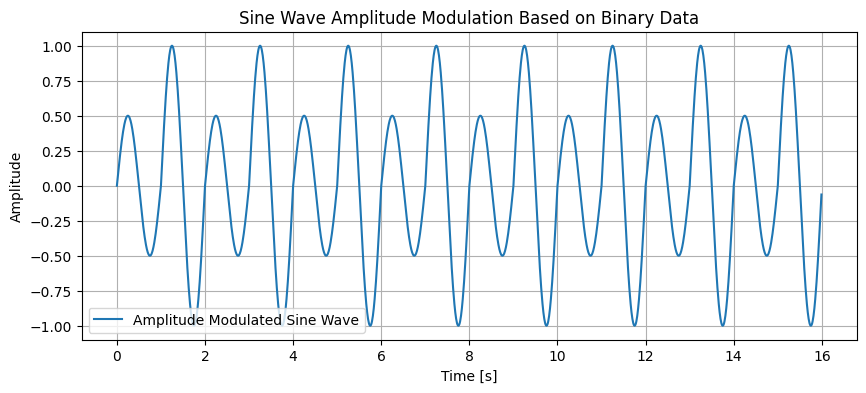

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define binary data to transmit
data = '0101010101010101'

# Parameters for the sine wave
frequency = 1  # Frequency of the sine wave
duration = 1   # Duration of each bit in seconds
sample_rate = 100  # Samples per second

# Generate time array and sine wave data
t = np.linspace(0, len(data) * duration, int(sample_rate * duration * len(data)), endpoint=False)
y = np.zeros_like(t)  # Initialize the amplitude array

# Assign amplitude based on data
for i, bit in enumerate(data):
    start_index = i * sample_rate * duration
    end_index = start_index + sample_rate * duration
    amplitude = 0.5 if bit == '0' else 1  # Lower amplitude for '0', higher for '1'
    y[start_index:end_index] = amplitude * np.sin(2 * np.pi * frequency * t[start_index:end_index])

# Plotting the amplitude modulated sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y, label='Amplitude Modulated Sine Wave')
plt.title('Sine Wave Amplitude Modulation Based on Binary Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

## Ethernet Send


In [18]:
from scapy.all import Ether, sendp, Raw
import time

mac_adapter="c4:03:a8:d1:a6:82"
ip_wifi="172.20.7.186"
def text_to_binary(text):
    binary_result = ''.join(format(ord(char), '08b') for char in text)
    return binary_result + '0'
def send_packets(target_mac, data):
    """
    Send UDP packets with varying sizes based on binary data to simulate amplitude modulation.

    Args:
    target_ip (str): IP address of the target.
    data (str): Binary data to transmit where '0' = smaller payload, '1' = larger payload.
    target_port (int): Target port number for UDP packets.
    """
    packet_sizes = {'0': 10, '1': 12}  # Map '0' to 100 bytes and '1' to 500 bytes

    for bit in data:
        payload_size = packet_sizes[bit]
        payload = '.' * payload_size  # Generate a payload of repeated 'A's to the specified size
        packet = Ether(dst=mac_adapter, src="c4:03:a8:d1:a6:81")/Raw(load=payload)
        sendp(packet, verbose=False)
        print(f"Sent Eth packet with size {payload_size} bytes for bit '{bit}'")
        time.sleep(0.1)  # Delay to simulate time between packet transmissions

# Example usage:
target_mac = mac_adapter  # Adjust as necessary
data_text="ironcat"
binary_data= text_to_binary(data_text)
print(binary_data)
send_packets(target_mac, binary_data)

011010010111001001101111011011100110001101100001011101000
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 10 bytes for bit '0'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 12 bytes for bit '1'
Sent Eth packet with size 10 bytes for bit '0'
Se

## IP Send

In [24]:
from scapy.all import IP, send, Raw
import time
mac_adapter="c4:03:a8:d1:a6:82"
ip_wifi="172.20.7.186"
def text_to_binary(text):
    binary_result = ''.join(format(ord(char), '08b') for char in text)
    return binary_result + '0'
def send_packets(target_ip, data):
    """
    Send UDP packets with varying sizes based on binary data to simulate amplitude modulation.

    Args:
    target_ip (str): IP address of the target.
    data (str): Binary data to transmit where '0' = smaller payload, '1' = larger payload.
    target_port (int): Target port number for UDP packets.
    """
    packet_sizes = {'0': 10, '1': 12}  # Map '0' to 100 bytes and '1' to 500 bytes

    for bit in data:
        payload_size = packet_sizes[bit]
        payload = 'A' * payload_size  # Generate a payload of repeated 'A's to the specified size
        packet = IP(src=ip_wifi,dst=target_ip)/Raw(load=payload)
        send(packet, verbose=False)
        print(f"Sent IP packet with size {payload_size} bytes for bit '{bit}'")
        time.sleep(0.1)  # Delay to simulate time between packet transmissions

# Example usage:
target_ip = "172.20.7.187"  # Adjust as necessary
data_text="cat"
binary_data= text_to_binary(data_text)
print(binary_data)
send_packets(target_ip, binary_data)

0110001101100001011101000
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 10 bytes for bit '0'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 12 bytes for bit '1'
Sent IP packet with size 10 bytes for bit '0'
Sent IP 

## Send ICMP

In [51]:
from scapy.all import IP, ICMP, send, Raw
import time
mac_adapter="c4:03:a8:d1:a6:82"
ip_wifi="172.20.7.186"
target_ip = "104.42.239.27"
def text_to_binary(text):
    binary_result = ''.join(format(ord(char), '08b') for char in text)
    return binary_result + '00'
def send_packets(target_ip, data):
    """
    Send ICMP packets with varying sizes based on binary data to simulate amplitude modulation.

    Args:
    target_ip (str): IP address of the target.
    data (str): Binary data to transmit where '0' = smaller payload, '1' = larger payload.
    target_port (int): Target port number for UDP packets.
    """
    packet_sizes = {'0': 1, '1': 2}  # Map '0' to 100 bytes and '1' to 500 bytes

    for bit in data:
        payload_size = packet_sizes[bit]
        # Could be randmoized between a set of characters as jitter
        payload = '&' * payload_size  # Generate a payload of repeated 'A's to the specified size
        packet = IP(src=ip_wifi, dst=target_ip)/ICMP()/Raw(load=payload)
        send(packet, verbose=False)
        print(f"Sent ICMP packet with size {payload_size} bytes for bit '{bit}'")
        time.sleep(0.01)  # Delay to simulate time between packet transmissions

# Example usage:
  # Adjust as necessary
data_text="ironcat is eternal"
binary_data= text_to_binary(data_text)
print(binary_data)
send_packets(target_ip, binary_data)

01101001011100100110111101101110011000110110000101110100001000000110100101110011001000000110010101110100011001010111001001101110011000010110110000
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 2 bytes for bit '1'
Sent ICMP packet with size 2 bytes for bit '1'
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 2 bytes for bit '1'
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 2 bytes for bit '1'
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 2 bytes for bit '1'
Sent ICMP packet with size 2 bytes for bit '1'
Sent ICMP packet with size 2 bytes for bit '1'
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 2 bytes for bit '1'
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 1 bytes for bit '0'
Sent ICMP packet with size 2 bytes for bit '1'
Sent IC

## UDP Send

In [37]:
from scapy.all import IP, UDP, send, Raw
import time

mac_adapter="c4:03:a8:d1:a6:82"
ip_wifi="172.20.7.186" #change based on ip address on wifi adapter
target_ip = "172.20.7.187" #change for external this is just local test
def text_to_binary(text):
    binary_result = ''.join(format(ord(char), '08b') for char in text)
    return binary_result + '0'
def send_packets(target_ip, data, target_port=443):
    """
    Send UDP packets with varying sizes based on binary data to simulate amplitude modulation.

    Args:
    target_ip (str): IP address of the target.
    data (str): Binary data to transmit where '0' = smaller payload, '1' = larger payload.
    target_port (int): Target port number for UDP packets.
    """
    packet_sizes = {'0': 100, '1': 500}  # Map '0' to 100 bytes and '1' to 500 bytes

    for bit in data:
        payload_size = packet_sizes[bit]
        payload = 'A' * payload_size  # Generate a payload of repeated 'A's to the specified size
        packet = IP(dst=target_ip)/UDP(dport=target_port)/Raw(load=payload)
        send(packet, verbose=False)
        print(f"Sent UDP packet with size {payload_size} bytes for bit '{bit}'")
        time.sleep(0.1)  # Delay to simulate time between packet transmissions

# Example usage:


data_text="cat"
binary_data= text_to_binary(data_text)
print(binary_data)
send_packets(target_ip, binary_data)

0110001101100001011101000
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 100 bytes for bit '0'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packet with size 500 bytes for bit '1'
Sent UDP packe

## TCP Send _experimental

In [ ]:
from scapy.all import IP, TCP, send
import time

def send_packets(target_ip, data, target_port=12345):
    """
    Send TCP packets using amplitude modulation to a target IP.

    Args:
    target_ip (str): IP address of the target.
    data (str): Binary data to transmit where '0' = 1 packet, '1' = 3 packets.
    target_port (int): Target port number for TCP packets.
    """
    # Establish a TCP connection
    syn_ack = sr1(IP(dst=target_ip)/TCP(dport=target_port, flags='S'), timeout=1)
    if not syn_ack:
        print("Connection failed")
        return
    seq = syn_ack.seq + 1
    ack = syn_ack.ack
    send(IP(dst=target_ip)/TCP(dport=target_port, sport=syn_ack[TCP].dport, ack=seq, seq=ack, flags='A'))

    # Send packets based on amplitude modulation
    for bit in data:
        burst_size = 1 if bit == '0' else 3  # Amplitude modulation: 1 packet for '0', 3 for '1'
        for _ in range(burst_size):
            ack += 1
            send(IP(dst=target_ip)/TCP(dport=target_port, sport=syn_ack[TCP].dport, ack=seq, seq=ack, flags='PA'), verbose=False)
            time.sleep(0.1)  # Short delay between packets in a burst

    # Close TCP connection
    send(IP(dst=target_ip)/TCP(dport=target_port, sport=syn_ack[TCP].dport, ack=seq, seq=ack+1, flags='FA'))
    sr1(IP(dst=target_ip)/TCP(dport=target_port, sport=syn_ack[TCP].dport, ack=seq+1, seq=ack+2, flags='A'), timeout=1)

# Example usage:
target_ip = "192.168.1.100"
send_packets(target_ip, '0101010101')
